<h1><center>What's Q-learning?

# The whole drama is for learning $Q(a_i, S_i)$

The simplest form of representing this function is using a table. 
A table of dimension $(#states, #actions)$. Each cell in the table denotes the value of being in a state $s$ and taking an action $a$ in $s$

## Frozen lake env in Gym
To establish and learn that kind of Q-table, Frozen lake env in Gym would be best fit.
This env is 4x4 grid, each cell can be a stable block, a hole or a goal position. 
Reward to be in any cell except goal cell is zero. Goal cell carries a reward of one.

Now possible states in this env is one of the cells, so, 16.
Similarly possible actions (left, right, top, bottom) are 4.
Let's dive.


In [1]:
import gym
import numpy as np

env = gym.make('FrozenLake-v0')

[2017-07-21 01:58:51,712] Making new env: FrozenLake-v0


In [2]:
print "#states =", env.observation_space.n
print "#actions =", env.action_space.n

#states = 16
#actions = 4


In [21]:
# Init Q table (Value function)

Q = np.zeros([env.observation_space.n, env.action_space.n])

# Now train the env by processing rewards and learn the Q function
episodes = 2000
learning_rate = 0.80
discount_fact = 0.95
rewards_over_episodes = []

# Play #episode games
for i in range(1, episodes):
    accumulated_reward_for_episode = 0
    done = False
    s = env.reset()  # Reset and get default/ init state.
    
    for _ in range(99):
        
        # We are learning now, greedily pick an action while being in state `s`
        action = np.argmax(Q[s, :] + (np.random.randn(1, env.action_space.n)*(1./(1 + i))))

        # See the consequence of this action
        new_state, reward, done, _ = env.step(action)
        
        # Alright, we have received reward, let's remember what earned us that amount
        # Bellman equation & the fact that we want the updation to be steady and small
        Q[s, action] =   Q[s, action] + learning_rate * (reward + (discount_fact * np.max(Q[new_state, :])))
                       - learning_rate * Q[s, action]
        
        # Updating iteration vals
        accumulated_reward_for_episode += reward
        s = new_state
        
        # Episode ended
        if done is True:
            break
            
    rewards_over_episodes.append(accumulated_reward_for_episode)
    if i % 100 == 0:
        print "Reward @ episode %d = %.2f" % (i, sum(rewards_over_episodes)/episodes)
    
print "TRAINING ENDED"
    

Reward @ episode 100 = 0.00
Reward @ episode 200 = 0.02
Reward @ episode 300 = 0.04
Reward @ episode 400 = 0.06
Reward @ episode 500 = 0.09
Reward @ episode 600 = 0.11
Reward @ episode 700 = 0.14
Reward @ episode 800 = 0.17
Reward @ episode 900 = 0.21
Reward @ episode 1000 = 0.24
Reward @ episode 1100 = 0.28
Reward @ episode 1200 = 0.31
Reward @ episode 1300 = 0.34
Reward @ episode 1400 = 0.37
Reward @ episode 1500 = 0.41
Reward @ episode 1600 = 0.45
Reward @ episode 1700 = 0.49
Reward @ episode 1800 = 0.52
Reward @ episode 1900 = 0.56
TRAINING ENDED


In [16]:
print Q

[[  2.43567931e-01   1.29953830e-02   1.37789988e-02   1.32270488e-02]
 [  7.30154553e-04   8.34075080e-04   3.19486029e-04   2.26955196e-01]
 [  2.92785670e-03   9.91106073e-02   4.55518449e-03   4.24503566e-03]
 [  6.06637322e-04   5.89402814e-04   0.00000000e+00   4.19002118e-02]
 [  3.60335085e-01   3.60273873e-03   8.06561456e-03   3.68616199e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.28962214e-04   1.14934259e-04   5.71909935e-02   4.39082815e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.65256390e-03   4.06607033e-01]
 [  3.66698844e-03   2.41311287e-01   0.00000000e+00   0.00000000e+00]
 [  7.74143483e-01   2.15206745e-04   0.00000000e+00   1.26652371e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.30694621e-01   0.00000000e+00]
 [  0.

### All good, but what if the env is complex?
In a way, that it has waay too many states and waaay too many possible actions?

Nothing, there will be a bigger table.
But, we have a better method to represent that kind of a big table 

We will train a Neuralnet to learn this Value function by feeding reward converted as target Q values.
Let's do that.

What should be the NeuralNet(NN) architecture? 

In the above code, we were trying to retrieve value benifits of all possible actions given a state $(s)$. 
So, this NN should accept state as input and output values (probabilities) of taking each of the four actions.
That means, NN will have an input layer of $(1x16)$ and output layer of $(1x4)$. 

Let there just be one layer in between, my hardware is too slow. 

In [7]:
# Let's first define NN
import tensorflow as tf
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

# Input layer
inputs = tf.placeholder(shape=(1, 16), dtype=tf.float32)

# Sandwich layer (1, 16)
layer_W = tf.Variable(tf.random_uniform((16, 32), 0, 0.1, dtype=tf.float32))
layer_b = tf.Variable(tf.zeros((1, 32), dtype=tf.float32))
layer = tf.matmul(inputs, layer_W)

# Output layer
output_W = tf.Variable(tf.random_uniform((16,4), 0, 0.1), dtype=tf.float32)
output_b = tf.Variable(tf.zeros((1, 4), dtype=tf.float32))
output = tf.matmul(inputs, output_W)
Q = output
get_action = tf.argmax(Q, 1)

# Error function
Q_target = tf.placeholder(shape=(1, 4), dtype=tf.float32)
error = Q_target - Q
reduced_mean_square_error = tf.reduce_sum(tf.square(error))  # loss function

# Minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
back_propagate = optimizer.minimize(reduced_mean_square_error)


###################################################################

sess = tf.Session()
init_global_vars = tf.global_variables_initializer()

episodes = 2000
discount_fact = 0.95
rewards_over_episodes = []
sess.run(init_global_vars)

# Play #episode games
for i in range(1, episodes):
    accumulated_reward_for_episode = 0
    done = False
    s = env.reset()  # Reset and get default/ init state.
    
    for _ in range(99):
        
        # We are learning now, greedily pick an action while being in state `s`
        # The following lines are that stupidity that kills your PC
#        s_one_hot = tf.one_hot(indices=[s], depth=16)
#        s_one_hot = sess.run(s_one_hot)
        s_one_hot = np.zeros((1, 16))
        s_one_hot[0, s] = 1
        action, Q_s = sess.run([get_action, Q], {inputs: s_one_hot})
        if np.random.rand(1) < 0.15:
                action[0] = env.action_space.sample()

        # See the consequence of this action
        new_state, reward, done, _ = env.step(action[0])
        # These too! 
#        env.render()
#        new_state_one_hot = tf.one_hot(indices=[new_state], depth=16)
#        new_state_one_hot = sess.run(new_state_one_hot)
        new_state_one_hot = np.zeros((1, 16))
        new_state_one_hot[0, new_state] = 1
        # Alright, we have received reward, let's remember what earned us that amount
        # Bellman equation & the fact that we want the updation to be steady and small
        Q_new = sess.run(Q, {inputs: new_state_one_hot})
        Q_targeted = Q_s
        Q_targeted[0, action[0]] = reward + (discount_fact * np.max(Q_new))
        sess.run(back_propagate, {Q_target: Q_targeted, inputs: s_one_hot })
#        print sess.run(error, {Q_target: Q_targeted, inputs: s_one_hot })
        
        # Updating iteration vals
        accumulated_reward_for_episode += reward
        s = new_state
        
        # Episode ended
        if done is True:
            break
            
    rewards_over_episodes.append(accumulated_reward_for_episode)
    if i % 1 == 0 and False:
        print "Reward @ episode %d = %.2f" % (i, sum(rewards_over_episodes)/episodes)
print "Percentage completion = %.2f" % ((sum(rewards_over_episodes) * 100.0)/ episodes)
print "TRAINING ENDED"



[2017-07-21 15:52:04,272] Making new env: FrozenLake-v0


 Percentage completion = 17.80
TRAINING ENDED


In [9]:
# Analyse what this Agent has learned
env.render()
sess.run(Q, {inputs: [[0, 1, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0,  0, 0, 0, 0]]})

  (Left)
SFFF
FHFH
FFFH
HFFG


array([[ 0.09951197,  0.12108366,  0.10376973,  0.15691705]], dtype=float32)

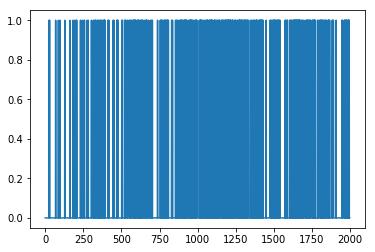

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rewards_over_episodes)

## TODO

1. Try other architectures and see how runs-to-learn is changing 
2. Reduce exploration as we learn better 
3. Modify env.render() to print inline (Easy to visualize)

___

## Cart-Pole env in Gym

Again, here we learn the Q-function; But this env demands a little more sophistication. Cart-Pole is the art of balancing a pole which initially stands in upright position; for as long as possible. For every time step the cart is in upright position, we get a reward +1, the episode ends when the cart is >2.4 units from center or pole falls over beyond 15 degrees from vertical.

Here observations are of `Box` class.

In *Frozen-Lake* problem, we explicitly didn't care about how our actions affected in long run. Let's try that here first! 

In [15]:
# Let's first define NN
import tensorflow as tf
import numpy as np
import gym
import time
env = gym.make('CartPole-v0')

# Input layer (A Box with 4 entries)
inputs = tf.placeholder(shape=(1, 4), dtype=tf.float32)

# Sandwich layer (4, 8)
layer_W = tf.Variable(tf.random_uniform((4, 8), 0, 0.1, dtype=tf.float32))
layer_b = tf.Variable(tf.zeros((1, 32), dtype=tf.float32))
layer = tf.matmul(inputs, layer_W)

# Output layer (Two possible actions)
output_W = tf.Variable(tf.random_uniform((8,2), 0, 0.1), dtype=tf.float32)
output_b = tf.Variable(tf.zeros((1, 4), dtype=tf.float32))
output = tf.matmul(layer, output_W)
Q = output
get_action = tf.argmax(Q, 1)

# Error function
Q_target = tf.placeholder(shape=(1, 2), dtype=tf.float32)
error = Q_target - Q
reduced_mean_square_error = tf.reduce_sum(tf.square(error))  # loss function

# Minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
back_propagate = optimizer.minimize(reduced_mean_square_error)


###################################################################

sess = tf.Session()
init_global_vars = tf.global_variables_initializer()

episodes = 2000
discount_fact = 0.95
rewards_over_episodes_1 = []
sess.run(init_global_vars)

# Play #episode games
for i in range(1, episodes):
    accumulated_reward_for_episode = 0
    done = False
    s = env.reset()  # Reset and get default/ init state.
    s = s.reshape(1, 4)
    
    for _ in range(99):
        
        # We are learning now, greedily pick an action while being in state `s`
        # The following lines are that stupidity that kills your PC
#        s_one_hot = tf.one_hot(indices=[s], depth=16)
#        s_one_hot = sess.run(s_one_hot)

        action, Q_s = sess.run([get_action, Q], {inputs: s})
        if np.random.rand(1) < 0.15:
                action[0] = env.action_space.sample()

        # See the consequence of this action
        new_state, reward, done, _ = env.step(action[0])
        # env.render()
        new_state = new_state.reshape(1, 4)
        # These too! 
        env.render()
#        new_state_one_hot = tf.one_hot(indices=[new_state], depth=16)
#        new_state_one_hot = sess.run(new_state_one_hot)

        # Alright, we have received reward, let's remember what earned us that amount
        # Bellman equation & the fact that we want the updation to be steady and small
        Q_new = sess.run(Q, {inputs: new_state})
        Q_targeted = Q_s
        Q_targeted[0, action[0]] = reward + (discount_fact * np.max(Q_new))
        sess.run(back_propagate, {Q_target: Q_targeted, inputs: s })
#        print sess.run(error, {Q_target: Q_targeted, inputs: s_one_hot })
        
        # Updating iteration vals
        accumulated_reward_for_episode += reward
        s = new_state
        
        # Episode ended
        if done is True:
            time.sleep(0.5)
            break
            
    rewards_over_episodes_1.append(accumulated_reward_for_episode)
    if i % 1 == 0 and False:
        print "Reward @ episode %d = %.2f" % (i, sum(rewards_over_episodes)/episodes)
print "Percentage completion = %.2f" % ((sum(rewards_over_episodes) * 100.0)/ episodes)
print "TRAINING ENDED"

[2017-07-25 14:23:58,230] Making new env: CartPole-v0


Percentage completion = 2546.80
TRAINING ENDED


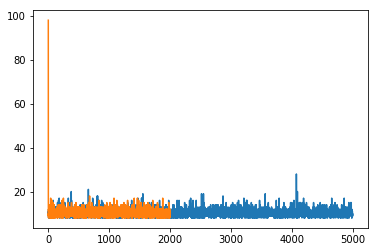

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(rewards_over_episodes)
plt.plot(rewards_over_episodes_1)

I ran two experiments, the blue one with 5000 episodes and the orange with 2000 episodes. 

It did learn that moving in opposite direction of pole declination will gain a reward. 

However, it isn't understanding that continuing in the same path will end the run. Can't blame the agent, it doesn't get a negative reward when it ends (Should we include that part? :D )

Let's do that below! 

In [25]:
# Let's first define NN
import tensorflow as tf
import numpy as np
import gym
import time
env = gym.make('CartPole-v0')

# Input layer (A Box with 4 entries)
inputs = tf.placeholder(shape=(1, 4), dtype=tf.float32)

# Sandwich layer (4, 8)
layer_W = tf.Variable(tf.random_uniform((4, 8), 0, 0.1, dtype=tf.float32))
layer_b = tf.Variable(tf.zeros((1, 32), dtype=tf.float32))
layer = tf.matmul(inputs, layer_W)

# Output layer (Two possible actions)
output_W = tf.Variable(tf.random_uniform((8,2), 0, 0.1), dtype=tf.float32)
output_b = tf.Variable(tf.zeros((1, 4), dtype=tf.float32))
output = tf.matmul(layer, output_W)
Q = output
get_action = tf.argmax(Q, 1)

# Error function
Q_target = tf.placeholder(shape=(1, 2), dtype=tf.float32)
error = Q_target - Q
reduced_mean_square_error = tf.reduce_sum(tf.square(error))  # loss function

# Minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
back_propagate = optimizer.minimize(reduced_mean_square_error)


###################################################################

sess = tf.Session()
init_global_vars = tf.global_variables_initializer()

episodes = 2000
discount_fact = 0.95
rewards_over_episodes_2 = []
sess.run(init_global_vars)

# Play #episode games
for i in range(1, episodes):
    accumulated_reward_for_episode = 0
    done = False
    s = env.reset()  # Reset and get default/ init state.
    s = s.reshape(1, 4)
    
    for _ in range(500):
        
        # We are learning now, greedily pick an action while being in state `s`
        # The following lines are that stupidity that kills your PC
#        s_one_hot = tf.one_hot(indices=[s], depth=16)
#        s_one_hot = sess.run(s_one_hot)

        action, Q_s = sess.run([get_action, Q], {inputs: s})
        if np.random.rand(1) < 0.15:
                action[0] = env.action_space.sample()

        # See the consequence of this action
        new_state, reward, done, _ = env.step(action[0])
        # env.render()
        new_state = new_state.reshape(1, 4)
        # These too! 
#        env.render()
#        new_state_one_hot = tf.one_hot(indices=[new_state], depth=16)
#        new_state_one_hot = sess.run(new_state_one_hot)

        # Alright, we have received reward, let's remember what earned us that amount
        # Bellman equation & the fact that we want the updation to be steady and small
        Q_new = sess.run(Q, {inputs: new_state})
        Q_targeted = Q_s
        Q_targeted[0, action[0]] = reward + (discount_fact * np.max(Q_new))
        sess.run(back_propagate, {Q_target: Q_targeted, inputs: s })
#        print sess.run(error, {Q_target: Q_targeted, inputs: s_one_hot })
        
        # Updating iteration vals
        accumulated_reward_for_episode += reward
        s = new_state
        
        # Episode ended
        if done is True:
            # time.sleep(0.5)
            reward = -100
            Q_new = sess.run(Q, {inputs: new_state})
            Q_targeted[0, action[0]] = reward + (discount_fact * np.max(Q_new))
            sess.run(back_propagate, {Q_target: Q_targeted, inputs: s })
            # Including a fake negative reward for screwing the goal
            
            break
            
    rewards_over_episodes_2.append(accumulated_reward_for_episode)
    if i % 1 == 0 and False:
        print "Reward @ episode %d = %.2f" % (i, sum(rewards_over_episodes)/episodes)
print "Percentage completion = %.2f" % ((sum(rewards_over_episodes) * 100.0)/ episodes)
print "TRAINING ENDED"

[2017-07-25 14:46:41,577] Making new env: CartPole-v0


Percentage completion = 2546.80
TRAINING ENDED


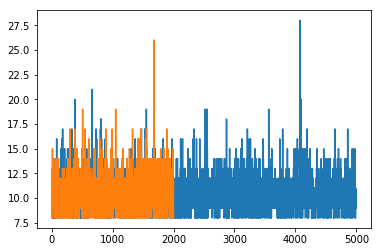

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(rewards_over_episodes)
plt.plot(rewards_over_episodes_2)

# Nope, nothing! 

Now let's consider taking an experience into account and see what that does to this.

In [55]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import gym

# MDP layout -> (State, Action, Reward, State_transition_prob, discount_factor)

class NeuralAgent(object):
    """ Agent capable of batch training & inference"""
    
    def __init__(self, state_space_size, action_space_size, hidden_layer_size, lr):
        
        # Inference / feedforward
        self.input_layer = tf.placeholder(shape=(None, state_space_size), dtype=tf.float32)
        hidden_layer = slim.fully_connected(inputs=self.input_layer, num_outputs=hidden_layer_size,
                                            activation_fn=tf.nn.relu, biases_initializer=None)
        self.output_layer = slim.fully_connected(inputs=hidden_layer, num_outputs=action_space_size, 
                                           activation_fn=tf.nn.softmax, biases_initializer=None)
        
        self.chosen_action = tf.argmax(self.output_layer,1)
        
        
        # Loss fn; loss = -reward x log(output_weight)
        self.rewards = tf.placeholder(shape=None, dtype=tf.float32)
        self.actions = tf.placeholder(shape=None, dtype=tf.int32)
        
        self.p1 = self.actions
        self.p2 = tf.range(0, tf.shape(self.output_layer)[0])
        self.p3 = tf.range(0, tf.shape(self.output_layer)[0]) * tf.shape(self.output_layer)[1]
        self.p4 = tf.range(0, tf.shape(self.output_layer)[0]) * tf.shape(self.output_layer)[1] + self.actions
        
        self.indices = tf.range(0, tf.shape(self.output_layer)[0]) * tf.shape(self.output_layer)[1] + self.actions
        self.related_weights = tf.gather(tf.reshape(self.output_layer, [-1]), indices=self.indices)
        
        self.loss = -tf.reduce_mean(tf.log(self.related_weights) * self.rewards)
        
        optimizer = tf.train.AdamOptimizer(learning_rate=lr)
        self.train = optimizer.minimize(self.loss)
        

gamma = 0.99

def discount_rewards(r, gamma=0.99):
    """Takes 1d float array of rewards and computes discounted reward
    e.g. f([1, 1, 1], 0.99) -> [1, 0.99, 0.9801]
    """
    return np.array([val * (gamma ** i) for i, val in enumerate(r)])
        
        
        
episodes = 100002
update_rate = 5
max_episode_length = 1000 / update_rate
reward_list = []

env = gym.make("CartPole-v0")
agent = NeuralAgent(state_space_size=4, action_space_size=2, hidden_layer_size=8, lr=0.01)
accumulated_reward = []

# Gotcha "Initialize variables after forming the AdamOpt graph "
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(tf.local_variables_initializer())
for i in range(episodes):
    
    episode_reward = 0
    s = env.reset() 
    s = s.reshape(1, 4)
    
    for _ in range(max_episode_length):
        
        # Accumulating experience
        episode_history = []
        for _ in range(update_rate):
    
            a_dist = sess.run(agent.output_layer, feed_dict={agent.input_layer: s})
            a = np.random.choice(a_dist[0], p=a_dist[0])
            a = np.argmax(a_dist == a)
            # todo; implement greedy selection

            new_state, reward, done, _ = env.step(action=action)
            new_state = new_state.reshape(1, 4)
            episode_history.append([s[0].tolist(), action, reward])
            
            episode_reward += reward
            s = new_state
            if done is True:
                break
        
        # Updating weights
        episode_history = zip(*episode_history)
        rewards_ = discount_rewards(np.array(episode_history[2])).reshape(-1, 1)
        actions_ = np.array(episode_history[1]).reshape(-1, 1)
        states_ = np.array(episode_history[0]).reshape(-1, 4)
        
        feed_dict = {agent.input_layer: states_, agent.rewards: rewards_, agent.actions: actions_}
        
#        for state_, reward_, action_ in zip(states_, rewards_, actions_):
#            feed_dict = {agent.input_layer: state_, agent.rewards: reward_, agent.actions: action_}
#            sess.run(agent.train, feed_dict=feed_dict)
        
        sess.run(agent.train, feed_dict=feed_dict)
#        sess.run(agent.loss, feed_dict)
        
        if done is True:
            accumulated_reward.append(episode_reward)
            break
            
    if i % 500 == 0:
        try:
            print "Aggregated reward until episode: %d is %.2f" % (i, np.mean(accumulated_reward[-100:]))
        
        except:
            print "Aggregated reward until episode: %d is %.2f" % (i, sum(accumulated_reward) / (i + 1.0))
        

[2017-07-31 16:37:48,358] Making new env: CartPole-v0


Aggregated reward until episode: 0 is 9.00
Aggregated reward until episode: 500 is 9.33
Aggregated reward until episode: 1000 is 9.35
Aggregated reward until episode: 1500 is 9.43
Aggregated reward until episode: 2000 is 9.26
Aggregated reward until episode: 2500 is 9.35
Aggregated reward until episode: 3000 is 9.44
Aggregated reward until episode: 3500 is 9.31
Aggregated reward until episode: 4000 is 9.39
Aggregated reward until episode: 4500 is 9.44
Aggregated reward until episode: 5000 is 9.26
Aggregated reward until episode: 5500 is 9.35
Aggregated reward until episode: 6000 is 9.34
Aggregated reward until episode: 6500 is 9.45
Aggregated reward until episode: 7000 is 9.39
Aggregated reward until episode: 7500 is 9.36
Aggregated reward until episode: 8000 is 9.35
Aggregated reward until episode: 8500 is 9.25
Aggregated reward until episode: 9000 is 9.30
Aggregated reward until episode: 9500 is 9.30
Aggregated reward until episode: 10000 is 9.28
Aggregated reward until episode: 1050

Aggregated reward until episode: 87500 is 9.41
Aggregated reward until episode: 88000 is 9.35
Aggregated reward until episode: 88500 is 9.40
Aggregated reward until episode: 89000 is 9.28
Aggregated reward until episode: 89500 is 9.35
Aggregated reward until episode: 90000 is 9.40
Aggregated reward until episode: 90500 is 9.41
Aggregated reward until episode: 91000 is 9.41
Aggregated reward until episode: 91500 is 9.38
Aggregated reward until episode: 92000 is 9.33
Aggregated reward until episode: 92500 is 9.25
Aggregated reward until episode: 93000 is 9.35
Aggregated reward until episode: 93500 is 9.35
Aggregated reward until episode: 94000 is 9.38
Aggregated reward until episode: 94500 is 9.32
Aggregated reward until episode: 95000 is 9.34
Aggregated reward until episode: 95500 is 9.31
Aggregated reward until episode: 96000 is 9.29
Aggregated reward until episode: 96500 is 9.22
Aggregated reward until episode: 97000 is 9.34
Aggregated reward until episode: 97500 is 9.34
Aggregated re

I don't know what happened there... 
It had been a few months since I was on this cart-pole.

And I've learnt Keras. 
So, I will be using Keras API with TF/ Theano (R.I.P) as a backend. 

Alright, target is to record buffer of experiences and learn on them.

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'theano'

import gym
import numpy as np
from keras.layers import Dense, Input, Flatten
from keras.models import Model


def build_neural_agent(input_dim):

    input_ = Input(shape=(4, 1))
    # reward = Input(shape=(1,))
    x = Dense(4, activation="relu")(input_)
    x = Dense(16, activation="relu")(x)
    x = Dense(8, activation="relu")(x)
    x = Flatten()(x)
    output = Dense(2, activation="softmax")(x)

    agent = Model(inputs=input_, outputs=output)
    agent.compile(
        optimizer="adam",
        loss="mse",
        metrics=["accuracy"]
    )

    return agent


def build_agent():

    agent = build_neural_agent((1, 4, 1))

    return agent


def get_action_proba(agent, state_, reward=0):

    action_proba = agent.predict(state_)

    return action_proba


def get_next_action(agent, state_, reward, greedy=False):

    action_proba = get_action_proba(reward=reward,
                                    state_=state_.reshape(1, 4, 1),
                                    agent=agent)
    # TODO implement greedy action picking

    return int(np.argmax(action_proba))


def sync_reward(reward, action):

    if reward > 0:
        y_true = np.array([0.0, 0.0])
        y_true[action] = 1.0
    else:
        y_true = np.array([1.0, 1.0])
        y_true[action] = 0.0

    return y_true


def simple_exploration():

    episodes = 2000
    max_episode_len = 500
    buffer_len = 50

    # Init env
    env = gym.make("CartPole-v0")
    agent = build_agent()
    reward = 0

    avg_reward_over_episodes = []
    for episode_num in range(episodes):

        current_state = env.reset()
        total_reward = 0
        buffer_a = []
        buffer_r = []
        for _ in range(max_episode_len):
            action = get_next_action(state_=current_state,
                                     agent=agent,
                                     reward=reward)
            next_state, reward, done, _ = env.step(action)
            env.render()
            total_reward += reward

            # How do we communicate reward with agent? TODO
            y_true = sync_reward(reward=reward, action=action)

            buffer_a.append(current_state)
            buffer_r.append(y_true.reshape(-1, 2))
            if len(buffer_a) >= buffer_len or done is True:
                buffer_a, buffer_r = np.array(buffer_a), np.array(buffer_r)
                agent.fit(x=buffer_a.reshape(-1, 4, 1),
                          y=buffer_r.reshape(-1, 2),
                          verbose=False)

                buffer_a, buffer_r = [], []

            if done is True:
                break

            current_state = next_state

        avg_reward_over_episodes.append(total_reward)

        if episode_num % 100 == 0:
            print("Average accumulated reward {}".format(
                np.array(avg_reward_over_episodes).mean())
            )


if __name__ == "__main__":
    simple_exploration()


[2018-01-22 16:36:48,097] Making new env: CartPole-v0


Average accumulated reward 13.0
Average accumulated reward 9.39603960396
Average accumulated reward 9.32835820896
Average accumulated reward 9.28571428571
Average accumulated reward 9.29177057357
Average accumulated reward 9.28343313373
Average accumulated reward 9.30116472546
Average accumulated reward 9.31954350927
Average accumulated reward 9.31835205993
Average accumulated reward 9.33296337403
Average accumulated reward 9.34365634366
Average accumulated reward 9.35876475931
Average accumulated reward 9.36303080766
Average accumulated reward 9.36587240584
Average accumulated reward 9.35760171306
Average accumulated reward 9.35776149234
Average accumulated reward 9.35665209244
Average accumulated reward 9.35508524397
Average accumulated reward 9.35702387562
Average accumulated reward 9.35718043135
